
Import the libraries and upload the IRIS.csv file into the notebook.

In [0]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files

uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving Iris.csv to Iris.csv


In [0]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In logistics regression, we have to deal with numbers. Let's see the Species and assign numbers for those.

In [0]:
iris_df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [0]:
species={'Iris-virginica':1,'Iris-setosa':2,'Iris-versicolor':3}

Now, we have to update the Species column with the numbers.

In [0]:
iris_df = iris_df.replace({'Species':species})

In [0]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2


We don't want the ID column.

In [0]:
iris_df.drop('Id',axis=1,inplace=True)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


Let's plot some graphs and clearout the movement.

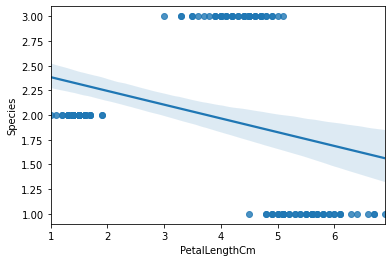

In [0]:
sns.regplot(x='PetalLengthCm',y='Species',data=iris_df)

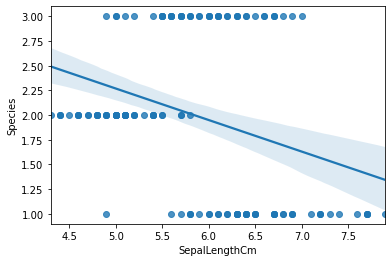

In [0]:
sns.regplot(x='SepalLengthCm',y='Species',data=iris_df)

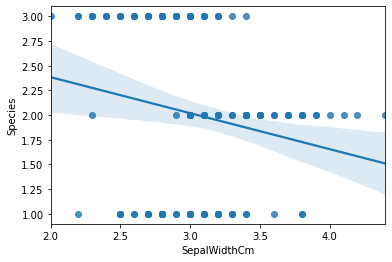

In [0]:
sns.regplot(x='SepalWidthCm',y='Species',data=iris_df)

Now, we have to split the data set. As the previous one, let's split as 70:30 

In [0]:
from sklearn.model_selection import train_test_split

X_train=iris_df.drop('Species',axis=1)
y_train=iris_df[['Species']]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30)

In [0]:
len(X_train)

105

In [0]:
len(X_test)

45

Let's train the model.

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Checking the accurecy.

In [0]:
model.score(X_test, y_test)

0.9777777777777777

In [0]:
y_predicted = model.predict(X_test)

Let's plot a heatmap.

Text(69.0, 0.5, 'Truth')

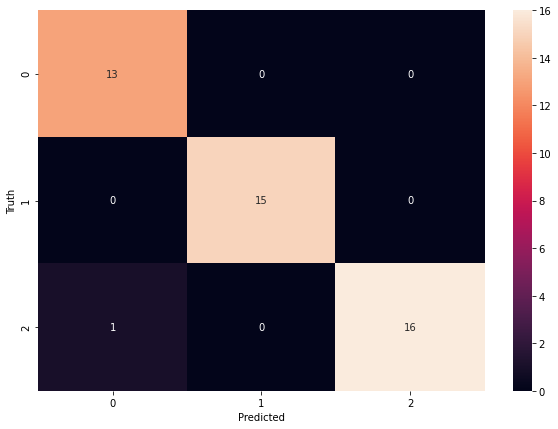

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')